### Building a Bigram Langauage Model

In [ ]:
import urllib
words = urllib.request.urlopen(
    'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'
    ).read().decode('utf-8').splitlines()

In [ ]:
# with open("names.txt") as f:
#   words = f.read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
chars = list(set(''.join(words)))
chars.sort()
special_token = "." # Token for begining of word and end of word
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
b={}
for word in words:
  word = [special_token] + list(word) + [special_token]
  for ch1,ch2 in zip(word,word[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram,0) + 1

In [ ]:
sorted(b.items(), key = lambda kv:-kv[1] )

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [ ]:
import torch

In [ ]:
N = torch.zeros((27,27),dtype=torch.int32)

In [ ]:
stoi = {ch:i+1 for i,ch in enumerate(chars)}
stoi[special_token] = 0
itos = {i:ch for ch,i in stoi.items()}

In [ ]:
stoi,itos

({'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26,
  '.': 0},
 {1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z',
  0: '.'})

In [ ]:
for word in words:
  word = [special_token] +list(word)+[special_token]
  for ch1,ch2 in zip(word,word[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

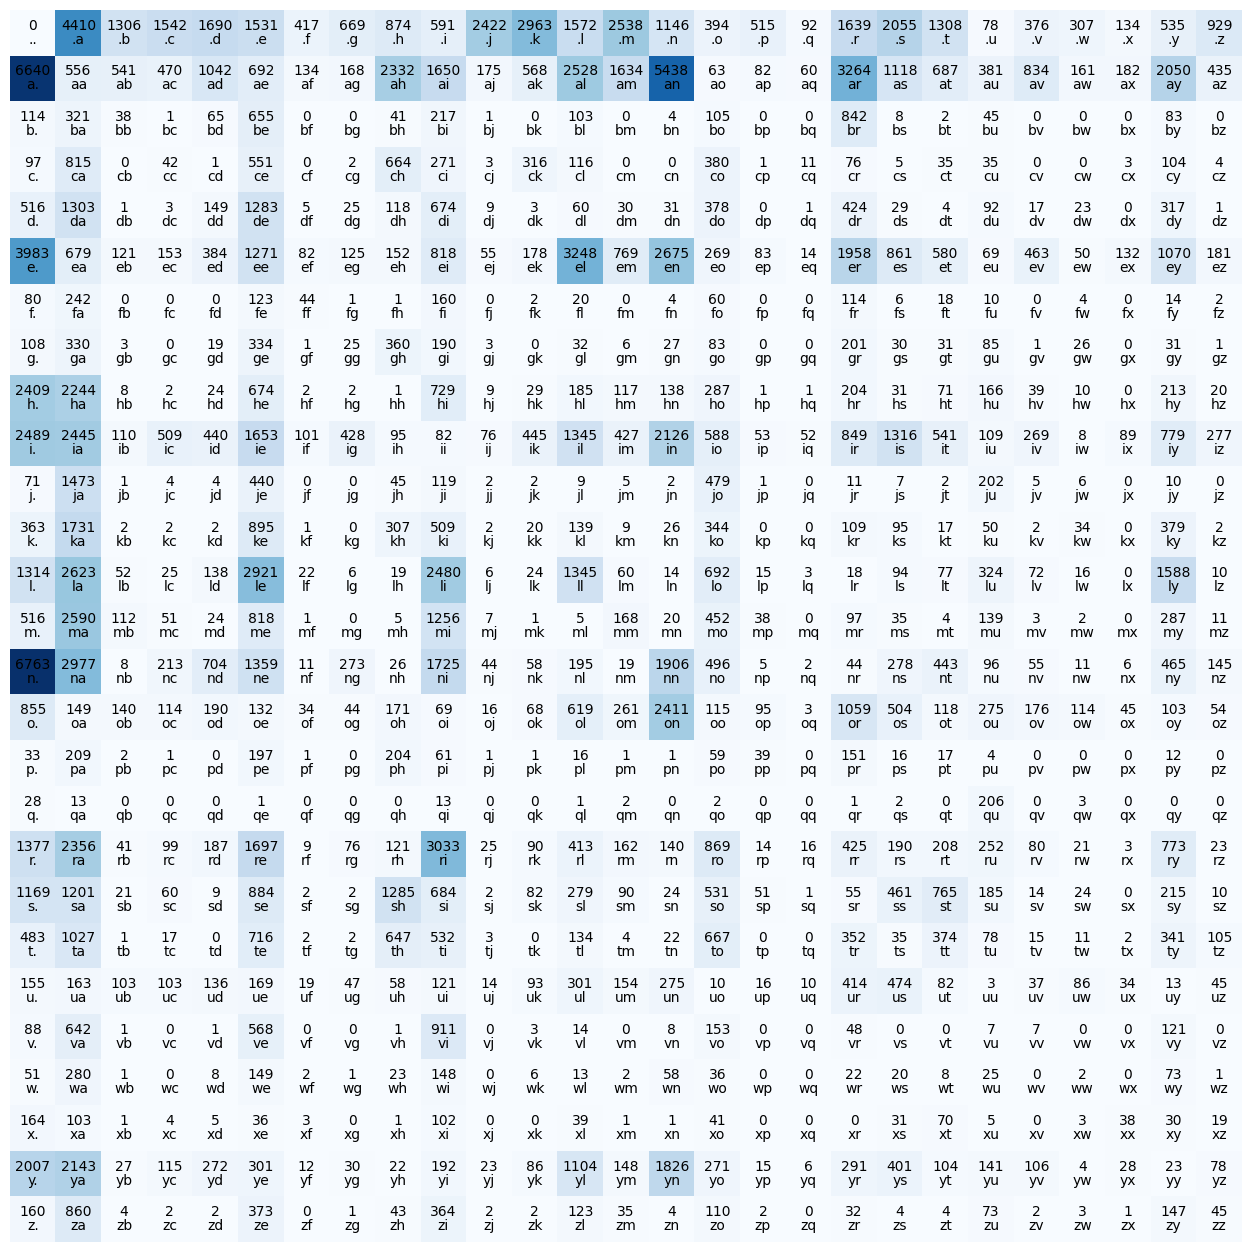

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")

for i in range(len(stoi)):
  for j in range(len(stoi)):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr,ha="center",va="top",color="black")
    plt.text(j,i,N[i,j].item(),ha="center",va="bottom",color="black")
    plt.axis("off")

In [ ]:
N[0].float()

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [ ]:
g = torch.Generator().manual_seed(2147483647)

In [ ]:
# Example of pulling index of samples based on the multinomial distribution
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p


tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [ ]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
print(ix)
print(itos[ix])

10
j


In [ ]:
# Broadcasting to get rowise probabilities
P = N.float()
P /= P.sum(1,keepdim=True)
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [ ]:
P[10].sum()

tensor(1.)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = 0
for i in range(5):
  out = []
  while True:
    p = P[ix]
    # p = N[ix].float()
    # p = p/p.sum()
    ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [ ]:
# Goal of this bigram model is to maximise the likelihood
# log(a*b*c) = log(a)+log(b)+log(c)
# equivalent to maximizing the log likelihood
# equivalent to minimizing the negative log likelihood
#  equivalent to minimizing the average negative log likelihood

In [ ]:
log_likelihood =0.0
n=0
for w in words:
  chs = ["."] + list(w) +["."]
  for ch1,ch2 in zip(w,w[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n=}")

log_likelihood=tensor(-412436.5625)
nll=tensor(412436.5625)
nll/n=tensor(2.5136)


### Neural Network approach to bigram models

In [ ]:
# Building the training set
xs,ys = [], []
for w in words:
  # print(w)
  # Get bigrams from the word
  chs = ["."] + list(w) +["."]
  for ch1,ch2 in zip(chs,chs[1:]):
    # print(ch1,ch2)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
xs.shape,ys.shape

(torch.Size([228146]), torch.Size([228146]))

In [ ]:
# One hot encode the input values
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

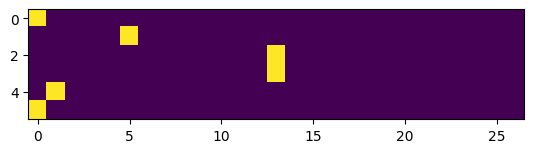

In [ ]:
plt.imshow(xenc[:6])

In [ ]:
# Goal is to build a NN bigram model that is similar to
# the Bigram model built using counts of bigrams above

num = xs.nelement()

# Initialize random weights
W = torch.randn((27,1)) # Only one neuron that takes 27 inputs

# Dot product of matrices
logits = xenc @ W  # We are intepreting the output as log-counts (logits)
print(xs.shape,W.shape)

# convert logits to count (convert from [-ve,0] to [0,inf])
##### - This block is nothing but softmax
counts = logits.exp()     # To be interpreted as counts and equivalent to N matrix used in bigram count model
probs = counts/ counts.sum(1,keepdim=True) # To be interpreted as probability
print(probs.sum(1,keepdim=True),probs.shape)
##### -End of block- This block is nothing but softmax


torch.Size([228146]) torch.Size([27, 1])
tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]) torch.Size([228146, 1])


In [ ]:
num = xs.nelement()
g = torch.Generator().manual_seed(2147483647)
# Initialize random weights
W = torch.randn((27,27),generator=g,requires_grad=True) # 27 neurons that takes 27 inputs (Each neuron has 27 weights associated with it)


In [ ]:

# Dot product of matrices
logits = xenc @ W  # We are intepreting the output as log-counts (logits)
print(xs.shape,W.shape)

# convert logits to count (convert from [-ve,0] to [0,inf])
##### - This block is nothing but softmax
counts = logits.exp()     # To be interpreted as counts and equivalent to N matrix used in bigram count model
probs = counts/ counts.sum(1,keepdim=True) # To be interpreted as probability
print(probs.sum(1,keepdim=True),probs.shape)
##### -End of block- This block is nothing but softmax

# Loss - negative log likelihood
loss = -probs[torch.arange(num),1].log().mean()
print(f"{loss=}")

torch.Size([228146]) torch.Size([27, 27])
tensor([[1.0000],
        [1.0000],
        [1.0000],
        ...,
        [1.0000],
        [1.0000],
        [1.0000]], grad_fn=<SumBackward1>) torch.Size([228146, 27])
loss=tensor(3.8136, grad_fn=<NegBackward0>)


In [ ]:
# Backward pass
print(f"{W.grad=}")
W.grad = None
loss.backward()
# Weights update
W.data += -0.1 * W.grad
print(f"{W.grad=}")

W.grad=None
W.grad=tensor([[ 8.5186e-03, -1.3901e-01,  1.7290e-03,  5.9105e-04,  2.3650e-03,
          1.7251e-03,  3.7827e-04,  3.2537e-03,  1.9233e-03,  4.3908e-03,
          1.1092e-03,  3.9029e-03,  1.2795e-03,  1.1525e-03,  7.0135e-03,
          3.3390e-02,  8.4714e-03,  3.4954e-04,  3.4975e-03,  7.6683e-04,
          4.7577e-03,  1.5319e-03,  4.0469e-04,  2.7821e-03,  1.6557e-03,
          2.1578e-02,  2.0485e-02],
        [ 2.2245e-03, -1.4724e-01,  5.8870e-03,  1.4875e-03,  9.0000e-03,
          4.5755e-03,  1.6104e-02,  1.9492e-03,  1.8574e-03,  7.1379e-04,
          1.5209e-02,  1.2764e-03,  1.4674e-02,  1.6567e-03,  3.4469e-03,
          3.0709e-03,  6.0620e-03,  1.1541e-03,  1.3357e-02,  7.8932e-03,
          6.8761e-03,  4.5888e-03,  7.6305e-04,  4.8803e-03,  9.7065e-03,
          7.4684e-03,  1.3566e-03],
        [ 2.8833e-04, -1.1502e-02,  3.6382e-04,  3.9935e-04,  1.0011e-04,
          1.1369e-04,  2.8475e-04,  2.0133e-04,  8.7878e-05,  5.3508e-05,
          6.3523e-04,

In [ ]:
## Putting together all the parts

# Create the training dataset
xs, ys = [], []

for w in words:
  chs = ["."]+ list(w)+["."]
  for ch1, ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs.dtype)
num = xs.nelement()
# Encode the input data
xenc = F.one_hot(xs,num_classes=27).float()
xenc.shape


torch.int64


torch.Size([228146, 27])

In [ ]:
# Initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g,requires_grad=True) # Initializing 27 neurons( 27 weigths/neuron)


In [ ]:
for e in range(100):
  # Forward propagation
  logits = xenc @ W
  counts = logits.exp()
  prob = counts/counts.sum(1,keepdim=True)

  regularization = 0.01*(W**2).mean()
  loss = -prob[torch.arange(num),ys].log().mean()+regularization
  print(f"{e=}, {loss=}")

  # Backward propagation
  # Zero-grad
  W.grad = None
  loss.backward()
  # Update Weigths
  W.data += -10 * W.grad

e=0, loss=tensor(3.7686, grad_fn=<AddBackward0>)
e=1, loss=tensor(3.6794, grad_fn=<AddBackward0>)
e=2, loss=tensor(3.5999, grad_fn=<AddBackward0>)
e=3, loss=tensor(3.5285, grad_fn=<AddBackward0>)
e=4, loss=tensor(3.4640, grad_fn=<AddBackward0>)
e=5, loss=tensor(3.4057, grad_fn=<AddBackward0>)
e=6, loss=tensor(3.3529, grad_fn=<AddBackward0>)
e=7, loss=tensor(3.3052, grad_fn=<AddBackward0>)
e=8, loss=tensor(3.2619, grad_fn=<AddBackward0>)
e=9, loss=tensor(3.2227, grad_fn=<AddBackward0>)
e=10, loss=tensor(3.1870, grad_fn=<AddBackward0>)
e=11, loss=tensor(3.1544, grad_fn=<AddBackward0>)
e=12, loss=tensor(3.1244, grad_fn=<AddBackward0>)
e=13, loss=tensor(3.0969, grad_fn=<AddBackward0>)
e=14, loss=tensor(3.0715, grad_fn=<AddBackward0>)
e=15, loss=tensor(3.0479, grad_fn=<AddBackward0>)
e=16, loss=tensor(3.0259, grad_fn=<AddBackward0>)
e=17, loss=tensor(3.0054, grad_fn=<AddBackward0>)
e=18, loss=tensor(2.9863, grad_fn=<AddBackward0>)
e=19, loss=tensor(2.9684, grad_fn=<AddBackward0>)
e=20, loss

In [ ]:
# Finally sampling from the NN
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1,keepdim=True)

    ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
    out.append(itos[ix])
    if ix == 0 :
      break
  print(''.join(out))

juwjde.
janaqah.
pxzfby.
a.
nn.


#### Exercises
- Train a Trigram model NN
- Split dataset into tran 80%, dev 10% and test 10%, evaluate outputs on dev and test set
- Regularise with different values and see its affect on train, dev set loss
- Can you eliminate one-hot encoding?
- Can we use F.cross_entropy instead? Why should we use F.cross_entropy?


In [ ]:
# Split sizes for Training, dev and test datasets
total_size = len(words)
train_size = int(total_size *0.8)
test_dev_size = total_size - train_size
dev_size = test_dev_size - int(test_dev_size*0.5)
test_size = test_dev_size - dev_size

print(f"{(train_size,test_size,dev_size)}")
print(f"{(train_size + test_size + dev_size)=}")
print(f"{total_size=}")

# spilt data
g = torch.Generator().manual_seed(42)
dataset = torch.utils.data.random_split(words,[train_size,dev_size,test_size],generator=g)

(25626, 3203, 3204)
(train_size + test_size + dev_size)=32033
total_size=32033


In [ ]:
# Character map
unique_chars = set(''.join(words))
sp_t1 = "." # Token for begining of word and end of word
sp_t2 = "_"
unique_chars.add(sp_t1)
unique_chars.add(sp_t2)
unique_chars
chars = list(unique_chars)
chars.sort()
print(chars)

ctoi = {ch:i for i,ch in enumerate(chars)}
itoc = {i:ch for i,ch in enumerate(chars)}

['.', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
# Bigram map
all_bigrams = [ch1+ch2 for ch1 in chars for ch2 in chars]
btoi={bi:i for i,bi in enumerate(all_bigrams)  }
itob={i:bi for i,bi in enumerate(all_bigrams)  }
total_bigrams = len(all_bigrams)

In [ ]:
train_words,dev_words,test_words = dataset[0],dataset[1],dataset[2]

In [ ]:
# # Data
# x_train, y_train, x_dev, y_dev, x_test, y_test = [], [], [], [], [], []
# # Training dataset
# for w in train_words:
#   chs = [".","_"]+list(w)+ ["."]
#   for inp1,inp2,out in zip(chs,chs[1:],chs[2:]):
#     ix1 = stoi[inp1]
#     ix2 = stoi[inp2]
#     ix3 = stoi[out]
#     x_train.append([ix1,ix2])
#     y_train.append(ix3)

# # Dev dataset
# for w in dev_words:
#   chs = [".","_"]+list(w)+ ["."]
#   for inp1,inp2,out in zip(chs,chs[1:],chs[2:]):
#     ix1 = stoi[inp1]
#     ix2 = stoi[inp2]
#     ix3 = stoi[out]
#     x_dev.append([ix1,ix2])
#     y_dev.append(ix3)

# # Test dataset
# for w in test_words:
#   chs = [".","_"]+list(w)+ ["."]
#   for inp1,inp2,out in zip(chs,chs[1:],chs[2:]):
#     ix1 = stoi[inp1]
#     ix2 = stoi[inp2]
#     ix3 = stoi[out]
#     x_test.append([ix1,ix2])
#     y_test.append(ix3)

# Data
x_train, y_train, x_dev, y_dev, x_test, y_test = [], [], [], [], [], []
# Training dataset
for w in train_words:
  chs = [".","_"]+list(w)+ ["."]
  for inp1,inp2,out in zip(chs,chs[1:],chs[2:]):
    ix1 = btoi[inp1+inp2]
    ix2 = ctoi[out]
    x_train.append(ix1)
    y_train.append(ix2)

# Dev dataset
for w in dev_words:
  chs = [".","_"]+list(w)+ ["."]
  for inp1,inp2,out in zip(chs,chs[1:],chs[2:]):
    ix1 = btoi[inp1+inp2]
    ix2 = ctoi[out]
    x_dev.append(ix1)
    y_dev.append(ix2)

# Test dataset
for w in test_words:
  chs = [".","_"]+list(w)+ ["."]
  for inp1,inp2,out in zip(chs,chs[1:],chs[2:]):
    ix1 = btoi[inp1+inp2]
    ix2 = ctoi[out]
    x_test.append(ix1)
    y_test.append(ix2)



In [ ]:
check = 1
test_inx = x_train[check]
test_inx,itob[test_inx],itoc[y_train[check]]

(34, '_e', 'd')

In [ ]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
x_dev = torch.tensor(x_dev)
y_dev = torch.tensor(y_dev)
x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test)

x_train.shape,y_train.shape,x_dev.shape,y_dev.shape,x_test.shape,y_test.shape

(torch.Size([182819]),
 torch.Size([182819]),
 torch.Size([22768]),
 torch.Size([22768]),
 torch.Size([22559]),
 torch.Size([22559]))

In [ ]:
y_train

tensor([ 6,  5, 10,  ..., 16, 15,  0])

In [ ]:
# xenc_train = F.one_hot(x_train,num_classes =27).float()
# xenc_dev = F.one_hot(x_dev,num_classes =27).float()
# xenc_test = F.one_hot(x_test,num_classes =27).float()

xenc_train = F.one_hot(x_train,num_classes =total_bigrams).float()
xenc_dev = F.one_hot(x_dev,num_classes =total_bigrams).float()
xenc_test = F.one_hot(x_test,num_classes =total_bigrams).float()
xenc_train.shape,xenc_dev.shape,xenc_test.shape

(torch.Size([182819, 784]), torch.Size([22768, 784]), torch.Size([22559, 784]))

In [ ]:
xenc_train[1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
# xenc_train = xenc_train.reshape(xenc_train.shape[0],xenc_train.shape[1]*xenc_train.shape[2])
# xenc_dev = xenc_dev.reshape(xenc_dev.shape[0],xenc_dev.shape[1]*xenc_dev.shape[2])
# xenc_test = xenc_test.reshape(xenc_test.shape[0],xenc_test.shape[1]*xenc_test.shape[2])

In [ ]:
xenc_train.shape,xenc_dev.shape,xenc_test.shape

(torch.Size([182819, 784]), torch.Size([22768, 784]), torch.Size([22559, 784]))

In [ ]:
train_num = xenc_train.shape[0]
dev_num = xenc_dev.shape[0]
test_num = xenc_test.shape[0]
train_num,dev_num,test_num

(182819, 22768, 22559)

In [ ]:
def forward_propagation(xs,ws):
  logits = xs @ ws
  counts = logits.exp()
  probs = counts / counts.sum(1,keepdim=True)
  return probs

def loss(probabilities,size,y_actuals,weights):
  loss = -probabilities[torch.arange(size),y_actuals].log().mean() + 0.01*(W**2).mean()
  return loss

In [ ]:
# Initialize network
W = torch.randn((total_bigrams,28),generator=g,requires_grad=True)

In [ ]:
for e in range(200):
  # Forward Propagation - Train data
  train_probs = forward_propagation(xenc_train,W)
  train_loss = loss(train_probs,train_num,y_train,W)

  # Forward Propagation - Dev data
  dev_probs = forward_propagation(xenc_dev,W)
  dev_loss = loss(dev_probs,dev_num,y_dev,W)

  # Backward Propagation
  W.grad = None
  train_loss.backward()
  # Update weights
  W.data += -100 * W.grad

  print(f"{e}:{train_loss.item()=},{dev_loss.item()=}")

0:train_loss.item()=2.2493157386779785,dev_loss.item()=2.2827298641204834
1:train_loss.item()=2.24922776222229,dev_loss.item()=2.2826526165008545
2:train_loss.item()=2.2491402626037598,dev_loss.item()=2.2825751304626465
3:train_loss.item()=2.2490527629852295,dev_loss.item()=2.282498359680176
4:train_loss.item()=2.2489659786224365,dev_loss.item()=2.282421827316284
5:train_loss.item()=2.2488791942596436,dev_loss.item()=2.282345771789551
6:train_loss.item()=2.248792886734009,dev_loss.item()=2.282269239425659
7:train_loss.item()=2.248706579208374,dev_loss.item()=2.282193660736084
8:train_loss.item()=2.2486209869384766,dev_loss.item()=2.282118320465088
9:train_loss.item()=2.248535394668579,dev_loss.item()=2.282043218612671
10:train_loss.item()=2.248450517654419,dev_loss.item()=2.281968593597412
11:train_loss.item()=2.248365640640259,dev_loss.item()=2.281893730163574
12:train_loss.item()=2.248281478881836,dev_loss.item()=2.2818198204040527
13:train_loss.item()=2.248197078704834,dev_loss.item

In [ ]:

for i in range(100):
  ix=1
  out=[]
  while True:
    input =  F.one_hot(torch.tensor([ix]),num_classes =total_bigrams).float()
    probs = forward_propagation(input,W)
    new_ix = torch.multinomial(probs,num_samples=1,generator=g,replacement=True).item()
    ix= btoi[itob[ix][-1]+itoc[new_ix]]

    out.append(itoc[new_ix])
    if new_ix == 0:
      break
  print(''.join(out))

rby.
anaza.
ana.
jah.
shor.
kah.
shesse.
ion.
trand.
jai.
rah.
sa.
ryn.
ranavor.
nah.
k.
el.
oquel.
sa.
makon.
dssanni.
akammy.
sjlng.
kal.
hadby.
yaakimmileen.
kel.
shawannyayangweonielleidras.
an.
jewf.
rief.
kaylizautkco.
roken.
alihair.
corhel.
yonatalynda.
bra.
aela.
prosiorabb.
fra.
kar.
yan.
min.
non.
caitlea.
er.
khaymaindie.
julunalornelei.
tanse.
seadneilarlizandocca.
chellenoe.
anna.
son.
tannah.
ma.
shayvi.
lin.
damkgwydn.
sbs.
amyszfurelon.
anguis.
anat.
gius.
yord.
al.
fare.
shuqlz.
no.
aarierah.
travynnagandranisle.
mcdne.
monie.
connah.
yanadeli.
dianiah.
faevessiahirianymwen.
aberylex.
fren.
norvermiyahmikah.
ty.
ca.
kyle.
caydaydikri.
my.
ra.
se.
hail.
jeao_adpqygaviouliex_fraia.
aus.
teori.
ko.
via.
brej.
aurily.
shenne.
cey.
caer.
rv.
daleah.
zequicon.
